In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import io
from PIL import Image
from matplotlib import image as mpimg
import pickle

In [7]:
#LSTM ADAM
k_folds = [
    [[1579, 75, 85], [112, 1445, 283], [82, 212, 1537]],
    [[1610, 72, 57], [123, 1498, 219], [90, 272, 1469]],
    [[1627, 59, 53], [151, 1367, 322], [99, 184, 1548]],
    [[1567, 86, 86], [127, 1440, 273], [87, 205, 1539]],
    [[1596, 67, 76], [139, 1458, 243], [93, 227, 1511]],
    [[1574, 84, 81], [134, 1416, 290], [77, 200, 1554]],
    [[1585, 73, 81], [142, 1426, 272], [93, 202, 1536]],
    [[1553, 101,85], [112, 1475, 253], [93, 259, 1479]],
    [[1605, 76, 58], [165, 1414, 261], [106, 228, 1497]],
    [[1585, 87, 67], [138, 1411, 291], [72, 185, 1574]]

    
    
]

In [8]:
named_labels = ['MI', 'NORM', 'OTHER']
named_labels = np.array(named_labels)

In [9]:
def model_performance(data):
    cf_matrix = data
    performance_result = []
    mean_performance_result = []
    true_positive = np.diag(cf_matrix)
    false_negative = np.sum(cf_matrix, axis=1) - true_positive
    false_positive = np.sum(cf_matrix, axis=0) - true_positive
    true_negative = np.sum(cf_matrix) - (true_positive + false_negative + false_positive)
    # Calculate the total number of samples
    total_samples = sum(sum(row) for row in cf_matrix)


    accuracy = (true_positive + true_negative) / total_samples
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)

    mean_accuracy = np.mean(accuracy)
    mean_sensitivity = np.mean(sensitivity)
    mean_specificity = np.mean(specificity)
    
    performance_result.extend((accuracy, sensitivity,  specificity))
    mean_performance_result.extend((mean_accuracy, mean_sensitivity,  mean_specificity))
    
    return cf_matrix, performance_result, mean_performance_result

In [10]:
def create_confusion_matrix(cf_matrix, no):
    # Create a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues', xticklabels=named_labels, yticklabels=named_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - Fold {no} DNN')
    plt.show()

KFold  1
Mean Accuracy: 89.54%
Mean Sensitivity: 84.43%
Mean Specificity: 92.13%
--------------------------------------------------


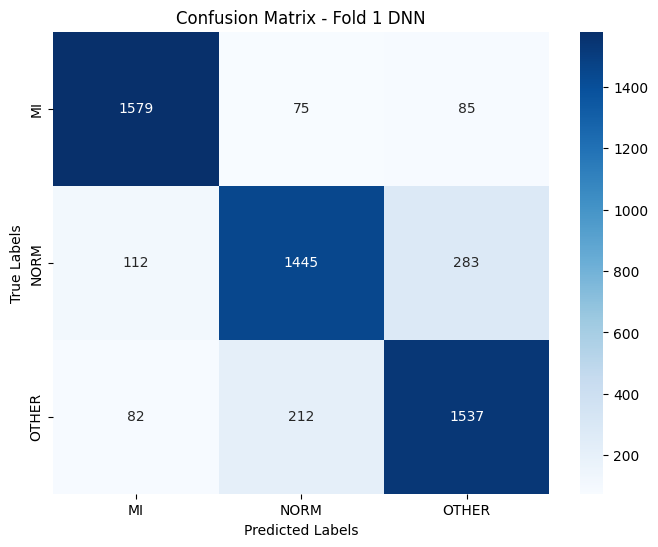

KFold  2
Mean Accuracy: 89.74%
Mean Sensitivity: 84.74%
Mean Specificity: 92.28%
--------------------------------------------------


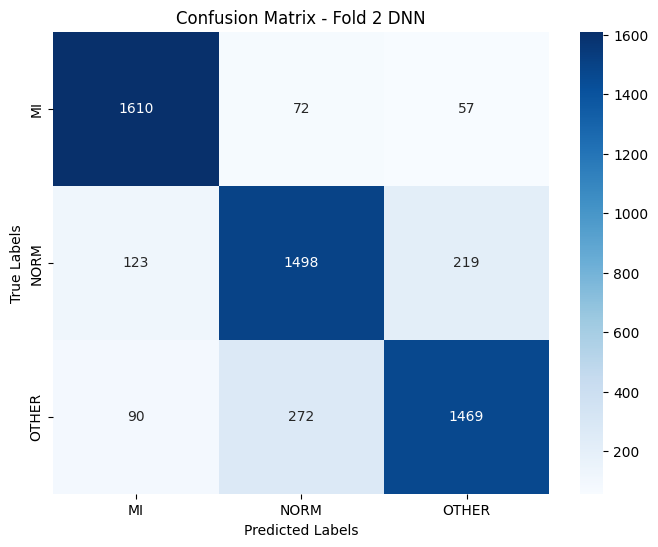

KFold  3
Mean Accuracy: 89.30%
Mean Sensitivity: 84.13%
Mean Specificity: 91.97%
--------------------------------------------------


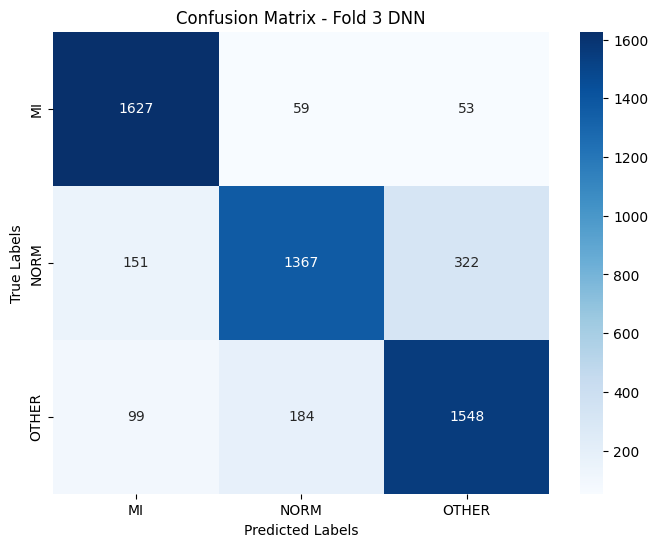

KFold  4
Mean Accuracy: 89.35%
Mean Sensitivity: 84.14%
Mean Specificity: 92.00%
--------------------------------------------------


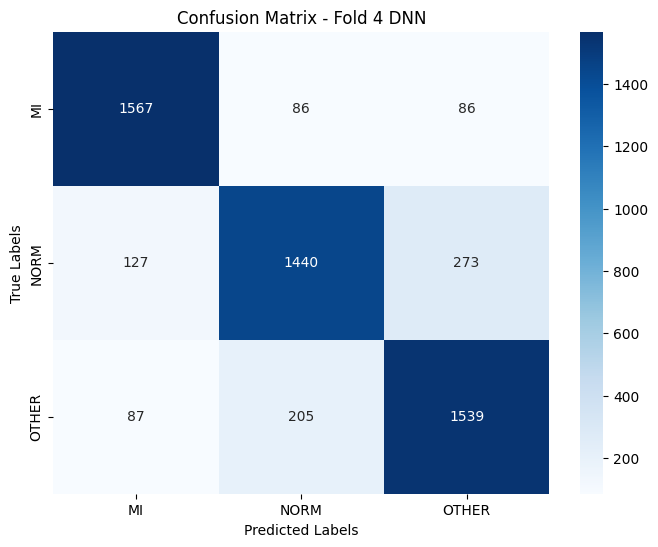

KFold  5
Mean Accuracy: 89.59%
Mean Sensitivity: 84.51%
Mean Specificity: 92.18%
--------------------------------------------------


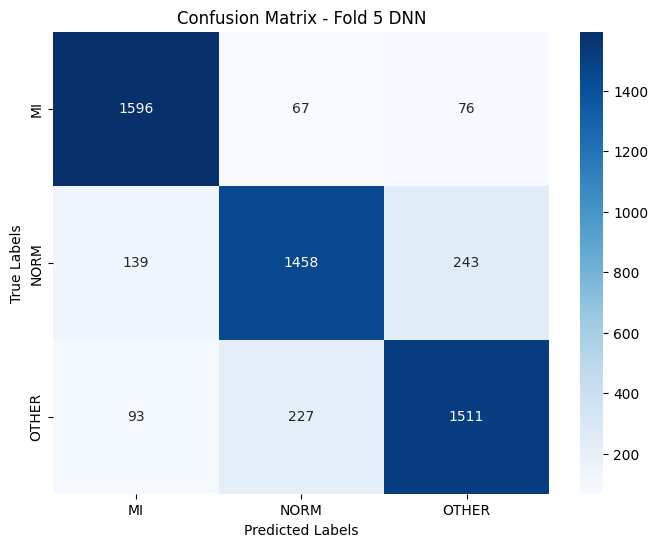

KFold  6
Mean Accuracy: 89.33%
Mean Sensitivity: 84.11%
Mean Specificity: 91.98%
--------------------------------------------------


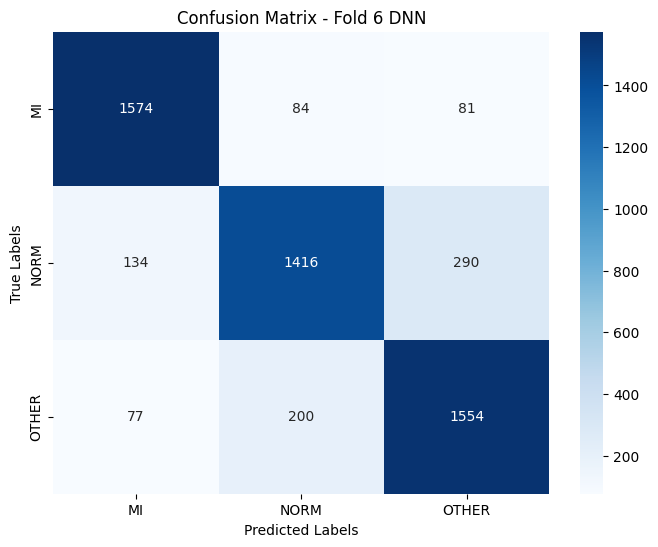

KFold  7
Mean Accuracy: 89.37%
Mean Sensitivity: 84.18%
Mean Specificity: 92.01%
--------------------------------------------------


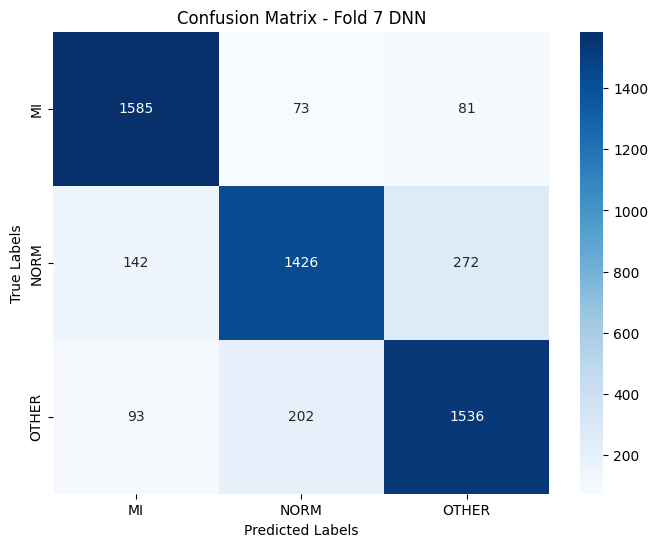

KFold  8
Mean Accuracy: 88.87%
Mean Sensitivity: 83.41%
Mean Specificity: 91.63%
--------------------------------------------------


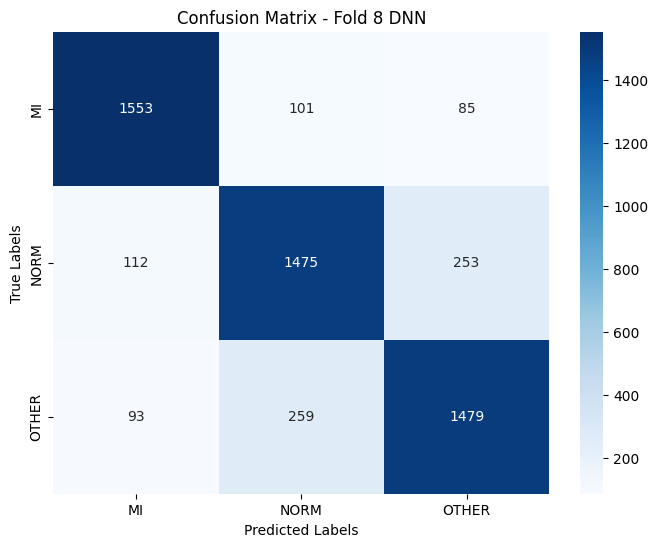

KFold  9
Mean Accuracy: 88.98%
Mean Sensitivity: 83.63%
Mean Specificity: 91.73%
--------------------------------------------------


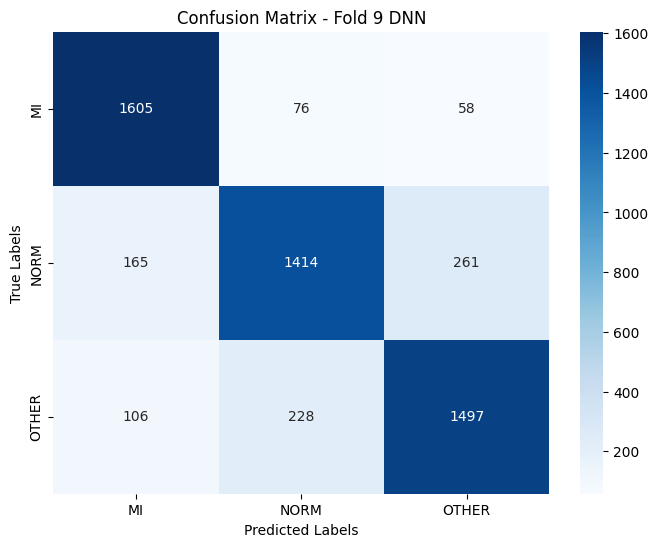

KFold  10
Mean Accuracy: 89.65%
Mean Sensitivity: 84.60%
Mean Specificity: 92.22%
--------------------------------------------------


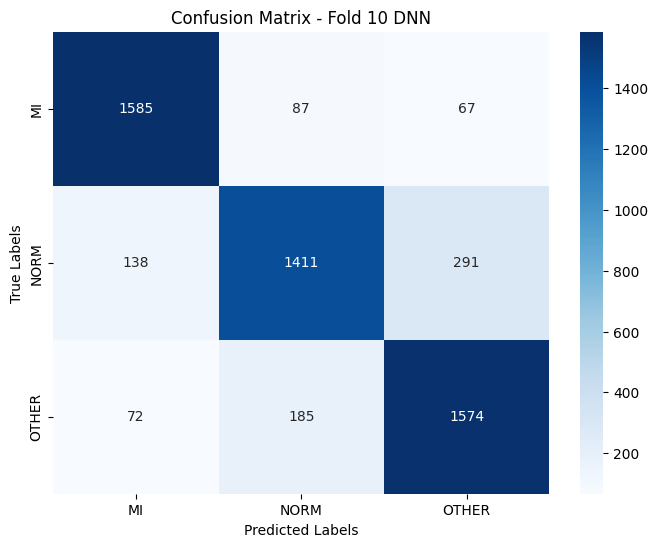

In [11]:
i = 1
for fold in k_folds :
    cf_matrix, performance_result, mean_performance_result = model_performance(fold)
    print("KFold ", i)
    formatted_mean_acc = "{:.2f}%".format(mean_performance_result[0]*100)
    formatted_mean_sensi = "{:.2f}%".format(mean_performance_result[1]*100)
    formatted_mean_spec = "{:.2f}%".format(mean_performance_result[2]*100)
    print("Mean Accuracy:", formatted_mean_acc)
    print("Mean Sensitivity:", formatted_mean_sensi)
    print("Mean Specificity:", formatted_mean_spec)
    print("--------------------------------------------------")
    
    create_confusion_matrix(fold, i)
    i = i + 1